# Programming for Data Analysis Project 2019


## Life expectancy of males living in Ireland

In [1]:
# Import the required libraries and use the standard abbreviations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Variables used
- Life expectancy
- Birth weight
- Birth place by province
- IQ
- Height

## 1. Variables involved and first attempt at a dataset

### Life expectancy of males in Ireland

When I say "life expectancy", what I am talking about is the mean age at death. It's something that affects all of us, and I am very curious to find out which of my chosen variables correlate with other.


After investigation I found that the mean life expectancy of males living in Ireland is 80.4 years. # http://publicpolicy.ie/downloads/papers/2019/Irish_Population_Health_Life_Expectancy_and_Mortality.pdf
I also found that it is not a perfect normal distribution. For instance, age can not be negative, and a normal distribution assumes negative possibilities. Also it seems impossible for males to reach 120 years of age due to genetic restrictions, yet the normal distribution assumes possible values till infinity. But despite these facts, the normal distribution describes the data I found well enough to use it.
It turns out the standard deviation is around 12. The standard deviation is a very useful number, which tells us how far from the mean 68 percent of the data is located. 95 percent of the data is located within 2 standard deviations.


In [2]:
# set the values for the mean and the standard deviation and use them to generate 1000 values, using the normal distribution.
meanle = 80.4
stdle = 12
le = np.random.normal(80.4, 12, 1000)

In [3]:
# display the 1000 values that were created. I'll only be doing this the first time to check if the code worked.
le

array([ 57.7800858 ,  62.12342289, 107.16090247,  90.27266061,
        90.00155136,  85.09897143,  63.70473594,  60.60369028,
        79.4734547 ,  73.36943277,  95.53117746,  73.6300542 ,
        76.70629215,  75.11653294,  67.88241454,  84.20042445,
        85.85422652,  91.89107395,  96.75218681,  80.86631414,
        64.47569439,  83.3203633 , 105.12689739,  83.26732493,
        69.08986175,  70.90928693,  60.73274136,  81.39781528,
        88.83895976,  91.37246495,  89.41350521,  78.70947739,
        73.9000412 ,  87.13657431,  83.08438061,  85.83445239,
        86.24175872,  92.76175715,  77.28595357,  93.30223537,
        99.33859741,  88.1486601 ,  56.90273224,  88.71960413,
        72.70014178,  84.68804506,  88.60826726,  86.75687771,
        81.20266651,  90.55015517,  67.53048899,  92.25377446,
        85.81598725,  93.46768726,  72.89351622,  80.59910476,
        68.9469762 ,  62.40906889,  86.49975467,  79.68881552,
        71.18139205,  93.64884762,  62.27738785,  70.17

C:\Users\Arnoud\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


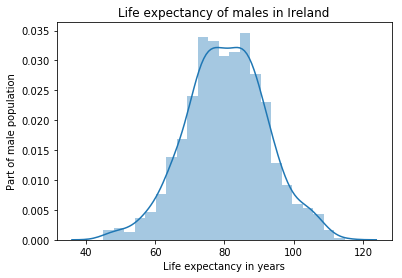

In [4]:
# Plot a distplot to take a quick look at the distribution
sns.distplot(le)
plt.xlabel("Life expectancy in years")
plt.ylabel("Part of male population")
plt.title("Life expectancy of males in Ireland");

Let's have a look at the mean and the medain

In [5]:
np.mean(le)

80.53181399574186

In [6]:
np.median(le)

80.51471294678397

The mean and the median are very close in value, which is a sign of a normally distributed variable.

Now that I know which distribution to use, I can start creating the first column of my synthesized dataset.

In [7]:
df = pd.DataFrame(le, columns = ["Life expectancy in years"])

In [8]:
# Display the life expectancy as an integer
df["Life expectancy in years"] = pd.DataFrame(le, columns = ["Life expectancy in years"])
df["Life expectancy in years"] = df["Life expectancy in years"].astype(int) # https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
df

,Life expectancy in years
0,57
1,62
2,107
3,90
4,90
5,85
6,63
7,60
8,79
9,73


### Birth weight

The mean birthweight for male babies in Ireland is 3541 grams. https://www.publichealth.ie/files/file/Unequal_at_Birth.pdf
Birth weight can be described by the normal distribution. Although, like with life expectancy, it is not perfect, it is close enough.
I could not find exact data for Ireland as regards to the standard deviation, but I found it to be 570 grams in the United States, and am going to assume it won't differ too much from the situation in Ireland. https://appohigh.enschool.org/ourpages/auto/2012/8/29/41712937/Standard%20Normal%20Distributions%209-24-12.pdf


In [9]:
meanbw = 3541
stdbw = 570
bw = np.random.normal(3541, 570, 1000)

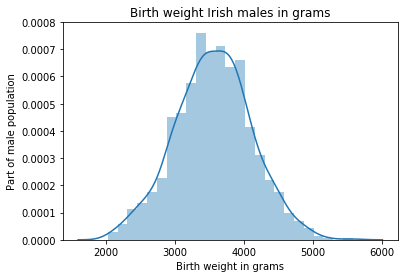

In [10]:
sns.distplot(bw) # distplot is used to take a quick look at the distribution
plt.xlabel("Birth weight in grams")
plt.ylabel("Part of male population")
plt.title("Birth weight Irish males in grams");

In [11]:
# Display the birth weight as an integer and add to dataframe
df["Birth Weight in grams"] = pd.DataFrame(bw, columns = ["Birth Weight in grams"])
df["Birth Weight in grams"] = df["Birth Weight in grams"].astype(int) # https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
df

,Life expectancy in years,Birth Weight in grams
0,57,2874
1,62,3914
2,107,2899
3,90,3277
4,90,3257
5,85,2402
6,63,3282
7,60,4159
8,79,3515
9,73,3760


In [12]:
# mean and median
np.mean(bw)

3560.790427839475

In [13]:
np.median(bw)

3559.0835830165643

The mean and median are again very close in value, suggesting a normal distribution.

### Province of birth

In [14]:
# Set the probabilities for someone to be born in each of the provinces. Figures derived from official data. 
# For ulster, the Northern-Irish counties have not been included.
ulster = 0.06
munster = 0.28
leinster = 0.54
connacht = 0.12

With numpy.random.choice we can now generate values for the different provinces, using the values set in the cell above.

In [15]:
prov = ["Ulster", "Munster", "Leinster", "Connacht"]
rprov = np.random.choice(prov, 1000, p=[ulster, munster, leinster, connacht])

In [16]:
df["Province"] = pd.DataFrame(rprov, columns = ["Province"])

In [17]:
df

,Life expectancy in years,Birth Weight in grams,Province
0,57,2874,Leinster
1,62,3914,Leinster
2,107,2899,Leinster
3,90,3277,Munster
4,90,3257,Munster
5,85,2402,Munster
6,63,3282,Leinster
7,60,4159,Leinster
8,79,3515,Leinster
9,73,3760,Munster


### IQ

IQ is a numerical value, with integers ranging from 0 to infinity (but very few score higher than 140). 
After investigation, I found that the average IQ in Ireland is 92. http://worldpopulationreview.com/countries/average-iq-by-country/
There is a lot of debate about which of the sexes has the highest IQ, but most research shows little to no difference. Therefore I am going to take 92 as the mean IQ of males in Ireland.
IQ is normally distributed (although not completely, as there is no negative IQ, but it is otherwise very close to being normally distributed). And I found that the standard deviation in developed countries is close to 12 https://infoproc.blogspot.com/2010/11/standard-deviations-around-world.html

In [18]:
avgiq = 92
std = 12

iq = np.random.normal(avgiq,std, 1000 )

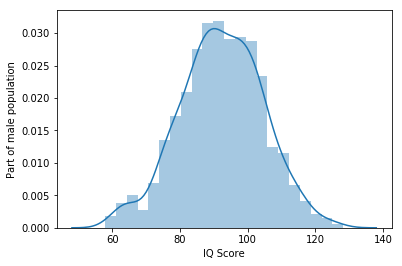

In [19]:
sns.distplot(iq)
plt.xlabel("IQ Score")
plt.ylabel("Part of male population");

As you can see in above plot, the values around the mean of 92 are highest represented, and the <em> bell curve </em> that the normal distribution gives, shows us the further away from 92, the more unlikely the scores are.

In [20]:
df["IQ"] = pd.DataFrame(iq, columns = ["IQ"])
df["IQ"] = df["IQ"].astype(int) # https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
df

,Life expectancy in years,Birth Weight in grams,Province,IQ
0,57,2874,Leinster,92
1,62,3914,Leinster,92
2,107,2899,Leinster,88
3,90,3277,Munster,97
4,90,3257,Munster,99
5,85,2402,Munster,116
6,63,3282,Leinster,84
7,60,4159,Leinster,84
8,79,3515,Leinster,80
9,73,3760,Munster,92


### Height

The average height of adult males in Ireland is 178.9 cm. https://www.thejournal.ie/height-irish-2899850-Jul2016/
Height is very close to being normally distributed. The standard deviation is around 7.6. https://ourworldindata.org/uploads/2019/06/distribution-1.png

In [21]:
meanh = 178.9
stdh = 7.6

height = np.random.normal(meanh, stdh, 1000)

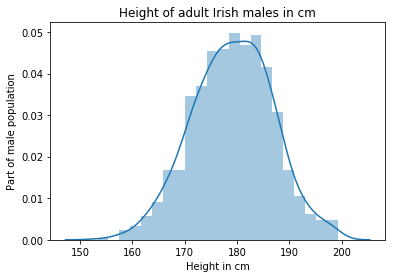

In [22]:
sns.distplot(height)
plt.xlabel("Height in cm")
plt.ylabel("Part of male population")
plt.title("Height of adult Irish males in cm");

In [41]:
df["Height in cm"] = pd.DataFrame(height, columns = ["Height in cm"])
df["Height in cm"] = df["Height in cm"].astype(int) # https://stackoverflow.com/questions/21291259/convert-floats-to-ints
df

,Life expectancy in years,Birth Weight in grams,Province,IQ,Height in cm
0,57,2874,Leinster,92,179
1,62,3914,Leinster,92,168
2,107,2899,Leinster,88,197
3,90,3277,Munster,97,187
4,90,3257,Munster,99,190
5,85,2402,Munster,116,182
6,63,3282,Leinster,84,180
7,60,4159,Leinster,84,174
8,79,3515,Leinster,80,177
9,73,3760,Munster,92,184


## 2. Relationships between variables

We now have a dataset with 1000 data points. The data is realistically distributed for every variable separataly. However, we have not yet considered any potential correlations between variables. I want to know the degree to which the variables are correlated, so I am going to try and find out the measure of interdepence (correlation) between the different variables. Numpy offers a way of doing this, using the <em> multivariate </em> function, which can be used on normal distributions. It gives you the opportunity to model linear correlations between random, normally distributed, variables. However, this function works with the covariance, and I am looking for the correlation. This means I also have to take the standard deviation into account. The correlation is the covariance, normalized by the product of standard deviations, which gives us a value <em>r</em>, between -1 and 1. # https://realpython.com/python-random/

After doing my research I found out the province of birth has little to no effect on the life expectancy or any of the other variables. Therefore I will regard this variable as random, not correlated with the rest, and will ignore it for the rest of this project. 
 
The other 4 variables are all related in some way or another, and through online research I have found estimated values for their covariance. I will use these covariances to calculate the correlations and display the correlated data in a new dataframe.

It turns out, the higher your iq, the higher your life expectancy. On the other hand, height had a clear negative covariance with life expectancy, as did birth weight (albeit to a lesser degree). A low birth weight is related to a lower iq, and the same is true for smaller people and iq. And finally there is a strong positive relationship between birth weight and height. I have estimated the covariances with the help of several scientific articles I found.
https://www.statnews.com/2017/06/28/high-iq-children-longevity-study/
https://medicalxpress.com/news/2014-03-genetic-link-height-iq.html
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1071721/
https://www.reuters.com/article/us-health-iq-birth-weight-idUSKCN18E29J
https://www.ncbi.nlm.nih.gov/pubmed/10206622

In [24]:
# Create a function "covstd" that can be called later. This function creates a covariance matrix from the correlations and standarddeviations.
def covstd(corrmatrix, stds) -> np.ndarray:
    cvmatrix = np.diag(stds)
    return cvmatrix @ corrmatrix @ cvmatrix # Multiply the matrices
    # I spent hours trying to figure out how to do this, and finally found some inspiration here: https://realpython.com/python-random/

In [42]:
# Set the covariances between the variables. The diagonal from top left to bottom right is always 1, as it is the covariance with the variable itself.
corr = np.array([[1, 0.18,0.4,-0.3],
                [0.18,1,0.3,0.65],
                [0.4,0.3,1,0.25], 
                [-0.3,0.65,0.25,1]]) # Controleren of correlaties een beetje kloppen met realiteit..
# https://realpython.com/python-random/

In [43]:
corr

array([[ 1.  ,  0.18,  0.4 , -0.3 ],
       [ 0.18,  1.  ,  0.3 ,  0.65],
       [ 0.4 ,  0.3 ,  1.  ,  0.25],
       [-0.3 ,  0.65,  0.25,  1.  ]])

In [44]:
std = np.array([12, 570, 12, 7.6])
mean = np.array ([80.4, 3541, 92, 178.9])
cov = covstd(corr, std)

In [45]:
lexp = np.random.multivariate_normal(mean = mean, cov = cov, size = 1000) #Link en comments toevoegen!

lexp.round(2)
# https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.random.multivariate_normal.html

array([[  73.87, 2971.65,   88.4 ,  178.  ],
       [  79.26, 3895.18,   80.22,  175.12],
       [  72.01, 2522.97,   89.02,  171.17],
       ...,
       [  78.69, 3046.51,   92.44,  182.22],
       [  66.66, 3001.34,   58.75,  173.82],
       [  81.08, 3365.82,   89.4 ,  178.72]])

In [48]:
dfcor = pd.DataFrame(lexp.round(2), columns = {"Life expectancy in years":np.random.normal(80.4, 12), "Birth weight in grams":np.random.normal(3541, 570), 
                                     "IQ":np.random.normal(92,12), "Height in cm":np.random.normal(178.9, 7.6)})

In [49]:
# Display dfcor and turn the floats into integers
dfcor = dfcor.astype(int) # https://stackoverflow.com/questions/21291259/convert-floats-to-ints
dfcor

,Life expectancy in years,Birth weight in grams,IQ,Height in cm
0,73,2971,88,178
1,79,3895,80,175
2,72,2522,89,171
3,57,3367,89,185
4,102,3959,117,177
5,103,3818,103,175
6,53,3887,97,190
7,78,3298,73,179
8,87,3878,109,188
9,90,2772,81,159


CHECK RESULTS WITH PEARSONR https://quantcorner.wordpress.com/2018/02/09/generation-of-correlated-random-numbers-using-python/

## 2.2 Visualizations and data check

Let's see if the correlations work correctly and check the values of the other variables for every person below 1.75, compared to everyone who is 1.75 or taller.

In [31]:
# Create 2 new categories, "Small people", and "Tall people".
smallpeople = dfcor[dfcor["Height in cm"].between(0,174)]

In [32]:
# Check to see if the code worked
smallpeople

,Life expectancy in years,Birth weight in grams,IQ,Height in cm
0,69,2749,96,171
1,50,2228,77,169
2,88,2668,98,168
7,68,4056,72,174
8,89,3211,95,163
14,70,3177,79,169
16,86,2918,93,171
20,88,4392,104,174
21,100,2273,97,168
23,80,3147,75,169


In [33]:
# Check the maximum values to get an idea of what values to use for "tallpeople". However these values are subject to change
# when the dataframe is generated again, so I choose to use 300 as a safe maximumvalue for Height in cm.
dfcor.max()

Life expectancy in years     115
Birth weight in grams       5657
IQ                           127
Height in cm                 205
dtype: int32

In [34]:
tallpeople = dfcor[dfcor["Height in cm"].between(174,300)]

In [35]:
tallpeople

,Life expectancy in years,Birth weight in grams,IQ,Height in cm
3,62,3820,61,181
4,65,3368,86,177
5,65,3350,78,184
6,95,4136,112,192
7,68,4056,72,174
9,80,3636,85,177
10,71,2788,85,186
11,67,3535,100,179
12,71,3927,88,181
13,67,3803,74,182


In [36]:
smallpeople.mean()

Life expectancy in years      84.618297
Birth weight in grams       3123.198738
IQ                            89.249211
Height in cm                 169.659306
dtype: float64

In [37]:
tallpeople.mean()

Life expectancy in years      78.479945
Birth weight in grams       3706.124481
IQ                            92.749654
Height in cm                 181.680498
dtype: float64

When looking at the mean values, it is clear that tall people have a much lower life expectancy, a much higher weight at birth, and a higher IQ. It seems our simulated dataset now shows proper correlations.

To further visualize the correlations I am going to plot a few interesting ones.

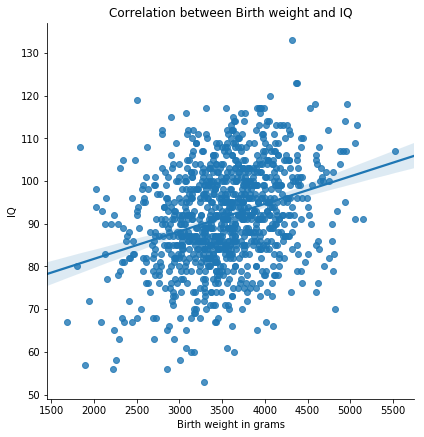

In [53]:
sns.lmplot(x="Birth weight in grams", y="IQ", data=dfcor, height = 6)
plt.title("Correlation between Birth weight and IQ");

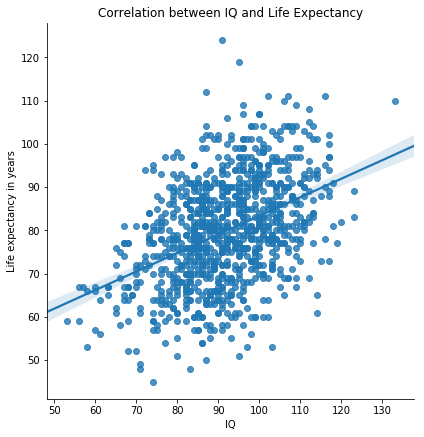

In [52]:
sns.lmplot(x="IQ", y="Life expectancy in years", data = dfcor, height = 6)
plt.title("Correlation between IQ and Life Expectancy");

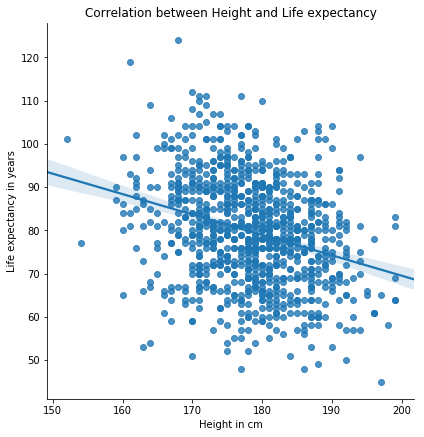

In [51]:
sns.lmplot(x="Height in cm", y="Life expectancy in years", data = dfcor, height = 6)
plt.title("Correlation between Height and Life expectancy");

Very clear to see the positive correlations between <em>birth weight</em> and <em>IQ</em>, and <em>IQ</em> and <em>life expectancy</em>. In the bottom plot, the negative correlation between <em>height</em> and <em>life expectancy</em> is easy to see. It seems we succeeded in simulating a correlated dataset.